# Introduction

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# baseline classifier
from sklearn.dummy import DummyRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


In [2]:
# load metadata
train_images = os.listdir('petfinder-pawpularity-score/train')
train_df = pd.read_csv('petfinder-pawpularity-score/train.csv')
train_df = train_df.set_index('Id')

In [3]:
train_df

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
Id,,,,,,,,,,,,,
0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20


In [4]:
train_df.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420,38.039044
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866,20.591990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [5]:
train_df.corr()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
Subject Focus,1.000000,0.076794,0.038252,0.058672,0.014006,0.020619,-0.052150,-0.038534,-0.075295,-0.076851,-0.040498,-0.046407,-0.009853
Eyes,0.076794,1.000000,0.584484,0.133127,-0.020544,0.052480,-0.084975,0.066361,0.036046,0.022143,0.038179,-0.507323,-0.006686
Face,0.038252,0.584484,1.000000,0.139031,-0.012022,0.034788,-0.108022,0.050847,0.024170,0.013389,0.024704,-0.068198,0.008018
Near,0.058672,0.133127,0.139031,1.000000,-0.027312,0.030234,-0.319107,-0.263498,0.065215,-0.009287,-0.146188,-0.017566,0.001001
Action,0.014006,-0.020544,-0.012022,-0.027312,1.000000,0.025377,-0.002432,-0.004270,-0.009429,-0.010832,-0.017191,0.012009,-0.001373
Accessory,0.020619,0.052480,0.034788,0.030234,0.025377,1.000000,-0.057301,0.065860,-0.041745,-0.038912,0.075063,-0.035012,0.013287
Group,-0.052150,-0.084975,-0.108022,-0.319107,-0.002432,-0.057301,1.000000,0.132007,-0.104287,0.003568,0.063311,0.007899,0.016469
Collage,-0.038534,0.066361,0.050847,-0.263498,-0.004270,0.065860,0.132007,1.000000,0.011476,0.054611,0.482141,-0.026591,0.001732
Human,-0.075295,0.036046,0.024170,0.065215,-0.009429,-0.041745,-0.104287,0.011476,1.000000,0.634381,0.018171,-0.015941,0.003983
Occlusion,-0.076851,0.022143,0.013389,-0.009287,-0.010832,-0.038912,0.003568,0.054611,0.634381,1.000000,0.117725,-0.006338,0.001979


<Axes: >

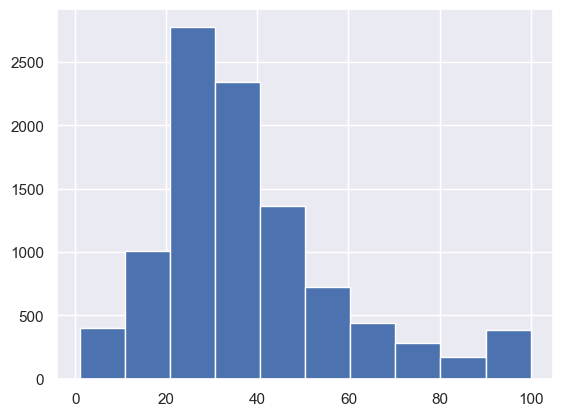

In [6]:
train_df['Pawpularity'].hist()

# Basse Model: Predict Mean Pawpularity Score

In [7]:
y = train_df['Pawpularity'].to_numpy()
X = train_df.drop(columns=['Pawpularity']).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=137)

In [8]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

21.279147676656578

In [9]:
dummy_model = DummyRegressor(strategy='mean')
scores = cross_val_score(dummy_model, X, y, cv=10, scoring='neg_root_mean_squared_error')
print("%0.2f RMSE with a standard deviation of %0.2f" % (-scores.mean(), scores.std()))

20.58 RMSE with a standard deviation of 0.56


# Random Forest

In [10]:
rf_regressor = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_root_mean_squared_error')
print("%0.2f RMSE with a standard deviation of %0.2f" % (-scores.mean(), scores.std()))

20.78 RMSE with a standard deviation of 0.59


No improvement over the dummy model!

# Use a CNN With Transfer Learning

Based on earlier experiments using a CNN is not yielding good results (comparable to dummy model). 

In [10]:
train_images = os.listdir('petfinder-pawpularity-score/train')
train_df = pd.read_csv('petfinder-pawpularity-score/train.csv')
train_df = train_df.set_index('Id')

file_names = []
labels = []

for index in train_df.index:
    file_name = 'petfinder-pawpularity-score/train/' + index + '.jpg'
    label = train_df.loc[index]['Pawpularity']
    file_names.append(file_name)
    labels.append(label/100.01)

train_files, val_files, labels_train, labels_val = train_test_split(file_names, labels, test_size=0.2, random_state=135)

def process_file_names_train(file_name, label):
    image_string = tf.io.read_file(file_name)
    img = tf.io.decode_jpeg(image_string, channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224,224])
    img = tf.keras.applications.efficientnet.preprocess_input(img) 
    # drop this for val data
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_saturation(img, 0.95, 1.05)
    img = tf.image.random_contrast(img, 0.95, 1.05)
    

    #img = tf.image.random_hue(img, 0.05)
    #img = tf.image.random_saturation(img, 0.7, 1.3)
    #img = tf.image.random_contrast(img, 0.8, 1.2)
    #img = tf.image.random_brightness(img, 0.15)
    return img, label

def process_file_names_val(file_name, label):
    image_string = tf.io.read_file(file_name)
    img = tf.io.decode_jpeg(image_string, channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224,224])
    img = tf.keras.applications.efficientnet.preprocess_input(img) 
    return img, label

train_dataset = tf.data.Dataset.from_tensor_slices((train_files, labels_train))
train_dataset = train_dataset.map(process_file_names_train)

val_dataset = tf.data.Dataset.from_tensor_slices((val_files, labels_val))
val_dataset = val_dataset.map(process_file_names_val)

def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(128)
    return ds

train_dataset = configure_for_performance(train_dataset)

val_dataset = configure_for_performance(val_dataset)

2024-03-27 20:50:27.874481: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-27 20:50:27.874515: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-27 20:50:27.874525: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-27 20:50:27.874739: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-27 20:50:27.875112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
tf.keras.backend.clear_session()

In [100]:
#base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, pooling='max')
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

In [101]:
#base_out = base_model.output
#out = tf.keras.layers.Dense(64,activation='selu')(base_out)
#output = tf.keras.layers.Dense(1)(out)

#model = tf.keras.Model(inputs = base_model.input, outputs=output)

In [102]:


model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64,activation='selu'),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1)
])

In [103]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0003),
                loss="mse",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

# use early stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# Train the model
history = model.fit(train_dataset,
                  epochs=10,
                  validation_data=val_dataset,
                  verbose=1,
                  callbacks=[early_stopping_callback])

Epoch 1/10
124/124 [==============================] - 97s 701ms/step - loss: 0.0538 - root_mean_squared_error: 0.2319 - val_loss: 0.0496 - val_root_mean_squared_error: 0.2228
Epoch 2/10
124/124 [==============================] - 74s 590ms/step - loss: 0.0455 - root_mean_squared_error: 0.2134 - val_loss: 0.0571 - val_root_mean_squared_error: 0.2390
Epoch 3/10
124/124 [==============================] - 73s 575ms/step - loss: 0.0471 - root_mean_squared_error: 0.2171 - val_loss: 0.0454 - val_root_mean_squared_error: 0.2131
Epoch 4/10
124/124 [==============================] - 72s 569ms/step - loss: 0.0456 - root_mean_squared_error: 0.2136 - val_loss: 0.0505 - val_root_mean_squared_error: 0.2248
Epoch 5/10
124/124 [==============================] - 67s 533ms/step - loss: 0.0451 - root_mean_squared_error: 0.2123 - val_loss: 0.0476 - val_root_mean_squared_error: 0.2182
Epoch 6/10
124/124 [==============================] - 70s 554ms/step - loss: 0.0448 - root_mean_squared_error: 0.2117 - val_l

# next try

In [12]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    base_model,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 64, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1, activation="relu")
])

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 5,restore_best_weights=True)


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100, decay_rate=0.96,
    staircase=True)

In [15]:
model.compile(loss="mse", 
              optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = lr_schedule), 
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

predictor = model.fit(train_dataset,
                      epochs=50, 
                      validation_data = val_dataset,
                      callbacks=[early_stopping])

Epoch 1/50


2024-03-27 20:50:43.422295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - 97s 1s/step - loss: 0.2078 - root_mean_squared_error: 0.4559 - val_loss: 0.1563 - val_root_mean_squared_error: 0.3955
Epoch 2/50
62/62 [==============================] - 78s 1s/step - loss: 0.0846 - root_mean_squared_error: 0.2909 - val_loss: 0.0754 - val_root_mean_squared_error: 0.2744
Epoch 3/50
62/62 [==============================] - 78s 1s/step - loss: 0.0629 - root_mean_squared_error: 0.2508 - val_loss: 0.0597 - val_root_mean_squared_error: 0.2438
Epoch 4/50
62/62 [==============================] - 78s 1s/step - loss: 0.0565 - root_mean_squared_error: 0.2378 - val_loss: 0.0575 - val_root_mean_squared_error: 0.2397
Epoch 5/50
62/62 [==============================] - 78s 1s/step - loss: 0.0530 - root_mean_squared_error: 0.2301 - val_loss: 0.0501 - val_root_mean_squared_error: 0.2235
Epoch 6/50
62/62 [==============================] - 79s 1s/step - loss: 0.0504 - root_mean_squared_error: 0.2246 - val_loss: 0.0518 - val_root_mean_squared_error

In [17]:
.2037 * 100.01

20.372037

In [52]:
for x_tensor, y_tensor in train_dataset.take(1):
    model.predict(x_tensor)

1/1 [==============================] - 0s 73ms/step


2024-03-26 12:47:37.613733: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [18]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, None, None, 1408   7768569   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1408)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 1)                 1409      
                                                                 
Total params: 7769978 (29.64 MB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 7768569 (29.63 MB)
_________________________________________________________________
